# 심장병 예측 경진대회 베이스라인

이번 대회는 의료데이터를 바탕으로 해당 환자에게 심장병이 있는지 없는지 판단하는 2진분류 대회입니다.

의료 데이터는 다양하게 존재할 수 있는데요 의료 데이터를 바탕으로 진단을 내리는 것은 현재도 활발하게 연구되고있는 분야중 하나입니다.

데이콘에서도 얼마전 [병변 검출 AI 경진대회](https://dacon.io/competitions/official/235855/overview/description)가 열렸는데요,

의료 영상, 차트 데이터 등 데이터와 AI로 더욱 정확한 판단을 할 수 있도록 돕고있습니다.

이번 대회에서는 환자의 데이터를 바탕으로 심장병 진단을 내리는 모델을 만들어 봅시다.

자 그럼 시작해볼까요?

## 데이터 불러오기

In [73]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import f1_score
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

heart_data = pd.read_csv('./data/train.csv')

In [74]:
heart_data.head()

id  age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0   1   53    1   2       130   197    1        0      152      0      1.2   
1   2   52    1   3       152   298    1        1      178      0      1.2   
2   3   54    1   1       192   283    0        0      195      0      0.0   
3   4   45    0   0       138   236    0        0      152      1      0.2   
4   5   35    1   1       122   192    0        1      174      0      0.0   

   slope  ca  thal  target  
0      0   0     2       1  
1      1   0     3       1  
2      2   1     3       0  
3      1   0     2       1  
4      2   0     2       1

이번 데이터는 문자열로 이루어진 데이터가 없어 따로 라벨 인코딩을 진행하지 않아도 됩니다.

하지만 이들의 생김새는 조금씩 달라보입니다.

cp는 데이터 명세를 살펴보면 가슴 통증의 종류로 나와있습니다.

따라서 age, chol과같이 수치를 나타낸다기보다 '종류'로 생각할 수 있습니다.

때문에 0, 1, 2, 3 이외에 다른 값을 가지지 않습니다. 

즉, 위의 데이터는 이미 라벨인코딩이 되어 우리에게 도착한 데이터라 생각해도 무방할 것입니다.

## 결측치 확인

데이터에 결측치가 존재하는지 확인해보겠습니다.

In [75]:
def check_missing_col(dataframe):
    counted_missing_col = 0
    for i, col in enumerate(dataframe.columns):
        missing_values = sum(dataframe[col].isna())
        is_missing = True if missing_values >= 1 else False
        if is_missing:
            counted_missing_col += 1
            print(f'결측치가 있는 컬럼은: {col}입니다')
            print(f'총 {missing_values}개의 결측치가 존재합니다.')

    if counted_missing_col == 0:
        print('결측치가 존재하지 않습니다')

check_missing_col(heart_data)

결측치가 존재하지 않습니다


# 모델 학습

가장 간단한 분류 모델 중 하나인 LogisticRegression을 이용하여 학습을 진행하고 성능을 측정해보겠습니다.

모델은 환자의 진단 기록을 바탕으로 심장병을 진단해야하기 때문에

진단 기록이 X, 심장병 여부를 y로 설정하겠습니다.

In [76]:
X = heart_data.iloc[:, 1:-1] # id와 target을 제거
y = heart_data.iloc[:, -1] # target만 선택

이제 LogisticRegression으로 모델을 학습시킨 뒤 정확도와 f1 score를 측정해 보겠습니다

In [77]:
logistic_regression_model = LogisticRegression()

logistic_regression_model.fit(X, y)

logistic_preds = logistic_regression_model.predict(X)

print(f'accuracy: {sum(logistic_preds == y) / len(y)}')
print(f'f1_score : {f1_score(y, logistic_preds)}')

accuracy: 0.8807947019867549
f1_score : 0.8953488372093023


# F1 score?

이번 대회의 평가 산식(metric)은 F1 score 입니다.

F1 score가 무엇일까요?

f1 score는 정밀도(precision)와 재현률(recall)의 조화평균입니다.

그렇다면 정밀도와 재현률은 무엇일까요?

<img src= "https://upload.wikimedia.org/wikipedia/commons/thumb/2/26/Precisionrecall.svg/800px-Precisionrecall.svg.png" alt="nn_image" height="700" width="600">

*CC-BY-SA 4.0* [Walber](https://commons.wikimedia.org/wiki/User:Walber)  *[위키피디아](https://ko.wikipedia.org/wiki/%EC%A0%95%EB%B0%80%EB%8F%84%EC%99%80_%EC%9E%AC%ED%98%84%EC%9C%A8)*

정밀도는 모델이 심장병에 걸렸다 예측한 사람들 중에서 실제로 심장병이 있는 사람의 비율

재현률은 실제로 심장병이 있는 사람들 중 모델이 심장병에 걸렸다 예측한 비율입니다.

의료데이터를 분석하여 질병을 예측하는 모델을 만들 때 정밀도와 재현률 중 무엇에 더 중점을 두어야 할까요?

경우에 따라 다르겠지만, 질병에 걸린 사람에게 질병이 걸렸다고 정확히 알려주는 것이 중요할 것입니다. 

그래야 실제로는 병에 걸렸는데도 불구하고 병이 없다고 진단하는 일이 적을테니까요. 

즉, 재현률이 높은 모델이 좋은 모델일 것입니다.

하지만 정밀도 역시 모델의 중요한 지표중 하나입니다.

f1 score는 이 정밀도와 재현률의 조화평균입니다.

조화 평균을 사용하기 때문에 정밀도와 재현률 중 점수가 더 낮은 쪽에 가까운 점수를 산출합니다.

따라서 정밀도와 재현률 모두를 높이는 방향의 모델링이 진행되어야만 f1-score를 올릴 수 있는 것이죠.

위에서 f1 score를 확인해 보았으니 이번엔 정밀도와 재현률을 확인해 보겠습니다.

In [78]:
heart_data['preds'] = logistic_preds # dataframe에 예측값 삽입

predict_positive = heart_data[heart_data['preds'] == 1] # 심장병이 있다 예측한 데이터
predict_negative = heart_data[heart_data['preds'] == 0] # 심장병이 없다 예측한 데이터

true_positive = predict_positive[predict_positive['target'] == 1] # 심장병이 있다고 예측한 데이터에서 실제로 심장병이 있는 사람들의 데이터
false_positive = predict_positive[predict_positive['target'] == 0] # 심장병이 있다고 예측한 데이터에서 실제로는 심장병이 없는 사람들의 데이터

true_negative = predict_negative[predict_negative['target'] == 0] # 심장병이 없다고 예측한 데이터에서 실제로 심장병이 없는 사람들의 데이터
false_negetive = predict_negative[predict_negative['target'] == 1] # 심장병이 없다고 예측한 데이터에서 실제로는 심장병이 있는 사람들의 데이터



# 정밀도: 모델이 심장병이 있다고 예측한 사람들중 실제로 심장병이 있는 사람의 비율
precision = len(true_positive) / (len(true_positive) + len(false_positive))

# 재현율 : 실제로 심장병이 있는 사람들중 모델이 심장병이 있다 예측한 사람의 비율
recall = len(true_positive) / (len(true_positive) + len(false_negetive))

f1 = 2 * precision * recall / (precision + recall)


print(f'정밀도: {precision}')
print(f'재현율: {recall}')
print(f'f1 스코어: {f1}')

정밀도: 0.8651685393258427
재현율: 0.927710843373494
f1 스코어: 0.8953488372093023


개인적으로는 정밀도보다 재현율이 높아 비교적 좋은 결과를 얻었다 이야기할 수 있을것같습니다!

모델이 어떻게 예측하였는지 위의 데이터를 통해서 확인해 볼 수 있을것 같은데요 

confusion matrix로 시각화해보도록 하겠습니다.

Text(0.5, 1.0, 'Confusion matrix')

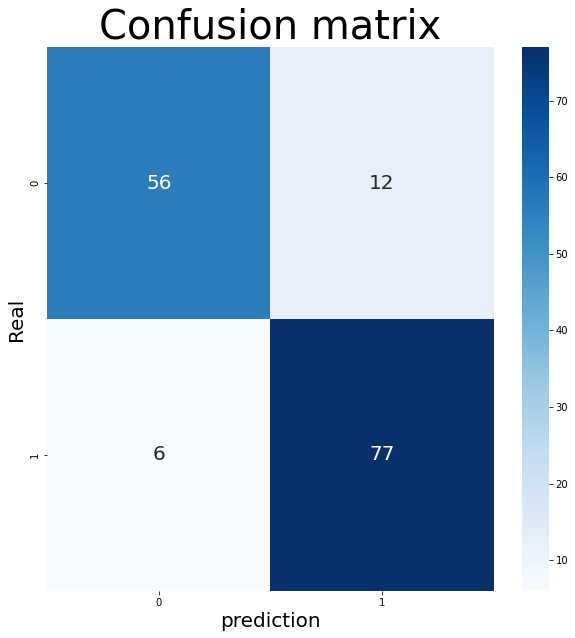

In [79]:
confusion_matrix = np.array([[len(true_negative), len(false_positive)], 
                             [len(false_negetive), len(true_positive)]])
plt.figure(figsize=(10, 10))
sns.heatmap(confusion_matrix, annot=True, annot_kws={'fontsize': 20}, cmap='Blues')
plt.xlabel('prediction', fontsize=20)
plt.ylabel('Real', fontsize=20)
plt.title('Confusion matrix', fontsize = 40)

## 모델의 예측이 틀린 데이터들

그럼 어떤 경우에 모델이 예측을 잘못한 것일까요?

한번 살펴봅시다!

In [80]:
false_negetive # 모델이 심장병이 없다 예측하였지만 실제로 심장병이 있는 사람들의 데이터

id  age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
22    23   53    1   0       142   226    0        0      111      1      0.0   
110  111   57    1   0       132   207    0        1      168      1      0.0   
111  112   62    1   2       130   231    0        1      146      0      1.8   
139  140   71    0   0       112   149    0        1      125      0      1.6   
140  141   53    1   2       130   246    1        0      173      0      0.0   
145  146   59    1   0       135   234    0        1      161      0      0.5   

     slope  ca  thal  target  preds  
22       2   0     3       1      0  
110      2   0     3       1      0  
111      1   3     3       1      0  
139      1   0     2       1      0  
140      2   3     2       1      0  
145      1   0     3       1      0

In [81]:
false_positive # 모델이 심장병이 있다 예측하였지만 실제로 심장병이 없는 사람들의 데이터

id  age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
7      8   60    1   2       140   185    0        0      155      0      3.0   
27    28   65    1   3       138   282    1        0      174      0      1.4   
30    31   63    0   0       124   197    0        1      136      1      0.0   
37    38   52    1   0       112   230    0        1      160      0      0.0   
48    49   45    1   3       110   264    0        1      132      0      1.2   
49    50   44    1   0       110   197    0        0      177      0      0.0   
50    51   57    1   1       124   261    0        1      141      0      0.3   
64    65   67    1   2       152   212    0        0      150      0      0.8   
74    75   58    0   1       136   319    1        0      152      0      0.0   
93    94   59    1   3       134   204    0        1      162      0      0.8   
113  114   59    0   0       174   249    0        1      143      1      0.0   
144  145   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  preds  
7        1   0     2       0      1  
27       1   1     2       0      1  
30       1   0     2       0      1  
37       2   1     2       0      1  
48       1   0     3       0      1  
49       2   1     2       0      1  
50       2   0     3       0      1  
64       1   0     3       0      1  
74       2   2     2       0      1  
93       2   2     2       0      1  
113      1   0     2       0      1  
144      1   1     2       0      1

위의 데이터들의 특징을 분석하면 더 좋은 모델을 만들 수 있지 않을까요?

이제 test set으로 예측 후 제출파일을 만들고 베이스라인을 마무리하도록 하겠습니다.

In [85]:
test_set = pd.read_csv('./data/test.csv')
test_set.head()

id  age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0   1   57    1   0       150   276    0        0      112      1      0.6   
1   2   59    1   3       170   288    0        0      159      0      0.2   
2   3   57    1   2       150   126    1        1      173      0      0.2   
3   4   56    0   0       134   409    0        0      150      1      1.9   
4   5   71    0   2       110   265    1        0      130      0      0.0   

   slope  ca  thal  
0      1   1     1  
1      1   0     3  
2      2   1     3  
3      1   2     3  
4      2   1     2

In [89]:
test_X = test_set.iloc[:, 1:] #id 제외 후 모든 데이터를 사용 

test_preds = logistic_regression_model.predict(test_X)

In [90]:
submission = pd.read_csv('./data/sample_submission.csv')
submission['target'] = test_preds

submission.to_csv('baseline.csv', index=False)

베이스라인 외에 여러분만의 좋은 방법이 있다면 코드공유를 통해 공유해주세요!

좋아요와 댓글을 합산하여 가장 높은 점수를 얻으신 분께 데이콘 후드가 제공됩니다!